## Data Split와 모델 검증

- 언제
  - 충분히 큰 데이터 셋을 가용할때
  - 아닐 시 교차 확인 고려

- 왜
  - 학습에 사용되지 않은 데이터를 사용하여 예측을 수행함으로써 모델의 일반적인 성능에 대한 적절한 예측을 함

- 방법
  - 홀드-아웃(Hold-out)
  - 교차검증(Cross Vaildation, CV)
  - 필요에 따라 Stratified Sampling

### 홀드- 아웃

- 데이터를 두 개 세트로 나누어 각각 train, test로 사용
- train과 test의 비율은 일반적으로 7:3 ~ 9:1
- train - Vaidation - test 로 나누기도 함

In [1]:
# 도미 데이터
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
                31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
                34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
                38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0,
                500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0,
                610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0,
                714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
# 빙어 데이터
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2,
                12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2,
                13.4, 12.2, 19.7, 19.9]

length = bream_length + smelt_length
weight = bream_weight + smelt_weight

# 2차원 리스트
fish_data = [[l, w] for l, w in zip(length, weight)]
fish_target = [1]*35 + [0] * 14

In [7]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

훈련 데이터셋과 테스트 데이터셋으로 분리

In [8]:
train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

학습 및 평가

In [9]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

데이터 섞기(shuffling)

In [10]:
import numpy as np

In [11]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [12]:
input_arr.shape

(49, 2)

In [13]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)  # 섞기

In [14]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [22]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

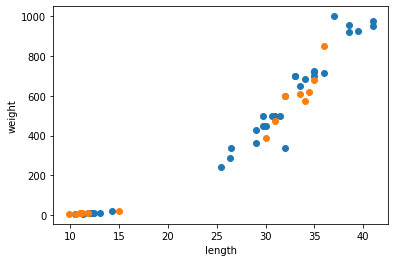

In [23]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [28]:
print(input_arr[13],train_input[0])

[ 32. 340.] [ 32. 340.]


In [32]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [33]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])